In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def threshold_image(img, threshold=0):
    img = np.float32(img)
    [thresh, img] = cv2.threshold(img, threshold, 6, cv2.THRESH_BINARY)
    return img

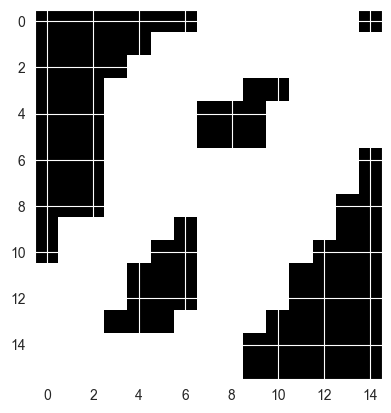

In [3]:
raw_data = []
with open('./ProjectDigits_materials/mfeat-pix.txt', 'r') as f:
    for line in f:
        pixels = []
        for c in line:
            if c.isdigit():
                pixels.append(int(c))
        raw_data.append(pixels)
raw_data = (np.array(raw_data))
raw_data = raw_data.reshape((2000, 16, 15))

test_img = raw_data[1750]

img = threshold_image(test_img)

fig = plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=6)

In [4]:
def count_circles(img, threshold=0):
    img = threshold_image(img, threshold)
    img = cv2.convertScaleAbs(img)

    contours = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    hierarchy = contours[1] if len(contours) == 2 else contours[2]
    contours = contours[0] if len(contours) == 2 else contours[1]

    hierarchy = hierarchy[0]

    count = 0
    result = img.copy()
    result = cv2.merge([result, result, result])

    for component in zip(contours, hierarchy):
        contour_component = component[0]
        hierarchy_component = component[1]

        if (hierarchy_component[3] > -1) & (hierarchy_component[2] < 0):
            count += 1
            cv2.drawContours(result, [contour_component], 0, (0, 0, 255), 2)

    return count

In [5]:
def get_circle_data(data, threshold=0):
    counter = 0
    circle_counts = []

    for digit in data:
        img = digit.reshape(16, 15)
        circle_count = count_circles(img, threshold)
        circle_counts.append(circle_count)
        #print("Circles in digit ", counter, ": ", circle_count)
        counter += 1

    circle_counts = np.array(circle_counts)
    return circle_counts

In [6]:
circle_data = get_circle_data(raw_data)

In [7]:
print(max(circle_data))

3


In [8]:

for digit in range(10):
    results = [0 for _ in range(max(circle_data + 1))]
    for i in range(200):
        results[circle_data[digit * 200 + i]] += 1
    print(digit, results)


0 [1, 196, 2, 1]
1 [197, 3, 0, 0]
2 [159, 33, 7, 1]
3 [191, 8, 1, 0]
4 [164, 30, 4, 2]
5 [162, 32, 3, 3]
6 [3, 191, 6, 0]
7 [195, 4, 1, 0]
8 [0, 5, 189, 6]
9 [4, 191, 5, 0]


In [17]:
train_set = [raw_data[x * 200:x * 200 + 100] for x in range(10)]
train_set = np.array(train_set).reshape((1000, 16, 15))
# plt.imshow(train_set[99], cmap='gray', vmin=0, vmax=6)
# plt.show()
# plt.imshow(train_set[100], cmap='gray', vmin=0, vmax=6)
# plt.show()


In [18]:
results = []
for digit in range(6):
    results.append(get_circle_data(train_set, threshold=digit))


In [20]:
for threshold, circle_data in enumerate(results):
    print(f'threshold {threshold}')
    for digit in range(10):
        circle_counts = [0 for _ in range(max(circle_data + 1))]
        for i in range(100):
            circle_counts[circle_data[digit * 100 + i]] += 1
        print(digit, circle_counts)

threshold 0
0 [0, 99, 1, 0]
1 [98, 2, 0, 0]
2 [81, 16, 2, 1]
3 [96, 4, 0, 0]
4 [78, 19, 3, 0]
5 [83, 13, 2, 2]
6 [0, 96, 4, 0]
7 [99, 0, 1, 0]
8 [0, 3, 92, 5]
9 [1, 96, 3, 0]
threshold 1
0 [0, 100, 0, 0, 0, 0]
1 [98, 2, 0, 0, 0, 0]
2 [89, 10, 1, 0, 0, 0]
3 [99, 1, 0, 0, 0, 0]
4 [89, 10, 1, 0, 0, 0]
5 [90, 7, 3, 0, 0, 0]
6 [0, 100, 0, 0, 0, 0]
7 [99, 1, 0, 0, 0, 0]
8 [0, 3, 95, 1, 0, 1]
9 [2, 98, 0, 0, 0, 0]
threshold 2
0 [0, 100, 0, 0, 0]
1 [99, 1, 0, 0, 0]
2 [97, 3, 0, 0, 0]
3 [100, 0, 0, 0, 0]
4 [93, 6, 1, 0, 0]
5 [95, 4, 1, 0, 0]
6 [0, 99, 1, 0, 0]
7 [99, 1, 0, 0, 0]
8 [0, 6, 93, 0, 1]
9 [2, 98, 0, 0, 0]
threshold 3
0 [1, 99, 0, 0, 0]
1 [99, 1, 0, 0, 0]
2 [99, 1, 0, 0, 0]
3 [100, 0, 0, 0, 0]
4 [97, 3, 0, 0, 0]
5 [99, 1, 0, 0, 0]
6 [0, 99, 1, 0, 0]
7 [100, 0, 0, 0, 0]
8 [0, 7, 92, 0, 1]
9 [1, 99, 0, 0, 0]
threshold 4
0 [9, 91, 0, 0]
1 [99, 1, 0, 0]
2 [99, 1, 0, 0]
3 [100, 0, 0, 0]
4 [98, 2, 0, 0]
5 [100, 0, 0, 0]
6 [17, 83, 0, 0]
7 [100, 0, 0, 0]
8 [7, 36, 56, 1]
9 [3, 97, 0, 0]
thre

In [24]:
expected = [1, 0, 0, 0, 0, 0, 1, 0, 2, 1]
for threshold, circle_data in enumerate(results):
    print(f'threshold {threshold}')
    as_expected = 0
    for digit in range(10):
        circle_counts = [0 for _ in range(max(circle_data + 1))]
        for i in range(100):
            if circle_data[digit * 100 + i] == expected[digit]: as_expected+=1
    print(as_expected)

threshold 0
918
threshold 1
957
threshold 2
973
threshold 3
983
threshold 4
923
threshold 5
915
